In [8]:
import pandas as pd
import numpy as np
import scipy
import scipy.misc
from PIL import Image
import imageio as iio
from pathlib import Path
import string
import glob
import os
import cv2
from matplotlib import pyplot as plt

In [9]:
############
###Labels###
#age: from 1 to 116
#gender: 0-male; 1-female
#race: 0-white; 1-black; 2-Asian; 3-Indian; 4-others(like Hispanic, Latino, Middle Eastern)
############

labels = pd.read_csv('./data/labels.csv', header = None)
labels = labels.values
#print(labels.shape)
#print(labels)

landmarks = pd.read_csv('labels_and_landmarks.csv')
#print(landmarks[1:10])
landmarks_only = landmarks[[str(i) for i in range(1,137)]]
print(landmarks_only)

        1   2   3   4   5    6   7    8   9   10  ...  127  128  129  130  \
0      -4  71  -4  96  -3  120  -1  144   9  166  ...  107  136  130  135   
1      13  76  13  96  15  117  18  137  25  158  ...  102  137  121  141   
2      11  62  14  84  18  105  23  127  33  147  ...  108  135  135  136   
3      36  66  34  86  38  108  45  129  54  150  ...  102  140  120  154   
4      -3  60  -3  85  -1  110   3  134  12  156  ...  109  137  126  141   
...    ..  ..  ..  ..  ..  ...  ..  ...  ..  ...  ...  ...  ...  ...  ...   
23700  -1  62  -1  88   0  113   2  139  10  162  ...  110  137  126  134   
23701   7  56   8  80   9  103  10  125  16  148  ...  100  144  121  148   
23702  15  66  13  89  15  112  20  136  28  158  ...  102  141  120  142   
23703  35  64  34  83  36  103  39  123  44  145  ...  105  135  129  137   
23704  -2  71   0  95   2  119   5  143  15  163  ...  110  135  131  139   

       131  132  133  134  135  136  
0      108  139   98  140   88  139  

In [10]:
print("labels of ages: {}".format(np.unique(labels[:, 0])))
print("labels of genders: {}".format(np.unique(labels[:, 1])))
print("labels of races: {}".format(np.unique(labels[:, -1])))

labels of ages: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  95  96  99 100 101 103 105 110 111 115 116]
labels of genders: [0 1]
labels of races: [0 1 2 3 4]


In [11]:
# read images from Faces folder
images = list()

filelist = glob.glob('./data/Faces/*.jpg')
for file in sorted(filelist, key=lambda s: int(s.strip(string.ascii_letters + "./"))):
    im = iio.imread(file)
    images.append(im)
images = np.array(images)
print(images.shape)

(23705, 200, 200, 3)


In [12]:
LANDMARK_SIZE = 15

def get_landmarks(X, imgNum, landmarks):
    pieces = []
    for i in range(len(landmarks)//2):
        lx = landmarks[2*i]
        ly = landmarks[2*i+1]
        if lx < LANDMARK_SIZE:
            lx = LANDMARK_SIZE
        if 200-LANDMARK_SIZE < lx:
            lx = 200-LANDMARK_SIZE
        if ly < LANDMARK_SIZE:
            ly = LANDMARK_SIZE
        if 200-LANDMARK_SIZE < ly:
            ly = 200-LANDMARK_SIZE
        piece = X[imgNum,lx-LANDMARK_SIZE:lx+LANDMARK_SIZE,ly-LANDMARK_SIZE:ly+LANDMARK_SIZE,:]
        pieces.append(piece)
    return np.array(pieces)

#def flattened_landmarks(X, imgNum, landmarks):
#    return np.array(get_landmarks(X, imgNum, landmarks)).flatten()

def landmarks_all(X, landmarks):
    data = np.memmap("landmark_memory.dat", dtype='uint8', mode="w+", shape=(len(X),len(landmarks[0])//2,2*LANDMARK_SIZE,2*LANDMARK_SIZE,3))
    for i in range(len(X)):
        lm = get_landmarks(X, i, landmarks[i,:])
        if lm is not None:
            np.copyto(data[i], lm, casting='no')
        if i%100 == 0:
            data.flush()
    return data

In [13]:
imgs = []
for piece in get_landmarks(images, 0, [-4,71,-4,96,-3,120,-1,144,9,166,28,179,53,186,77,192,100,194,121,191,142,183,161,174,180,161,192,142,195,120,194,97,192,74,16,53,29,39,48,33,68,34,86,40,113,39,129,33,148,32,164,37,175,49,100,59,101,72,101,85,101,99,78,112,89,113,100,116,110,114,120,111,39,62,51,61,61,60,71,65,60,63,50,62,124,64,134,59,144,59,155,62,144,62,134,62,55,137,72,134,87,132,97,133,107,131,120,132,136,133,121,143,109,146,98,147,88,146,72,145,61,138,87,137,97,138,107,136,130,135,108,139,98,140,88,139]):
    print(np.shape(piece))
    imgs.append(Image.fromarray(piece))

display(*imgs)

(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)


/var/folders/sc/txnrpgjj3_d8xd92sh09mddr0000gn/T/ipykernel_7156/4070345614.py:11: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(imgs) / columns + 1, columns, i + 1)


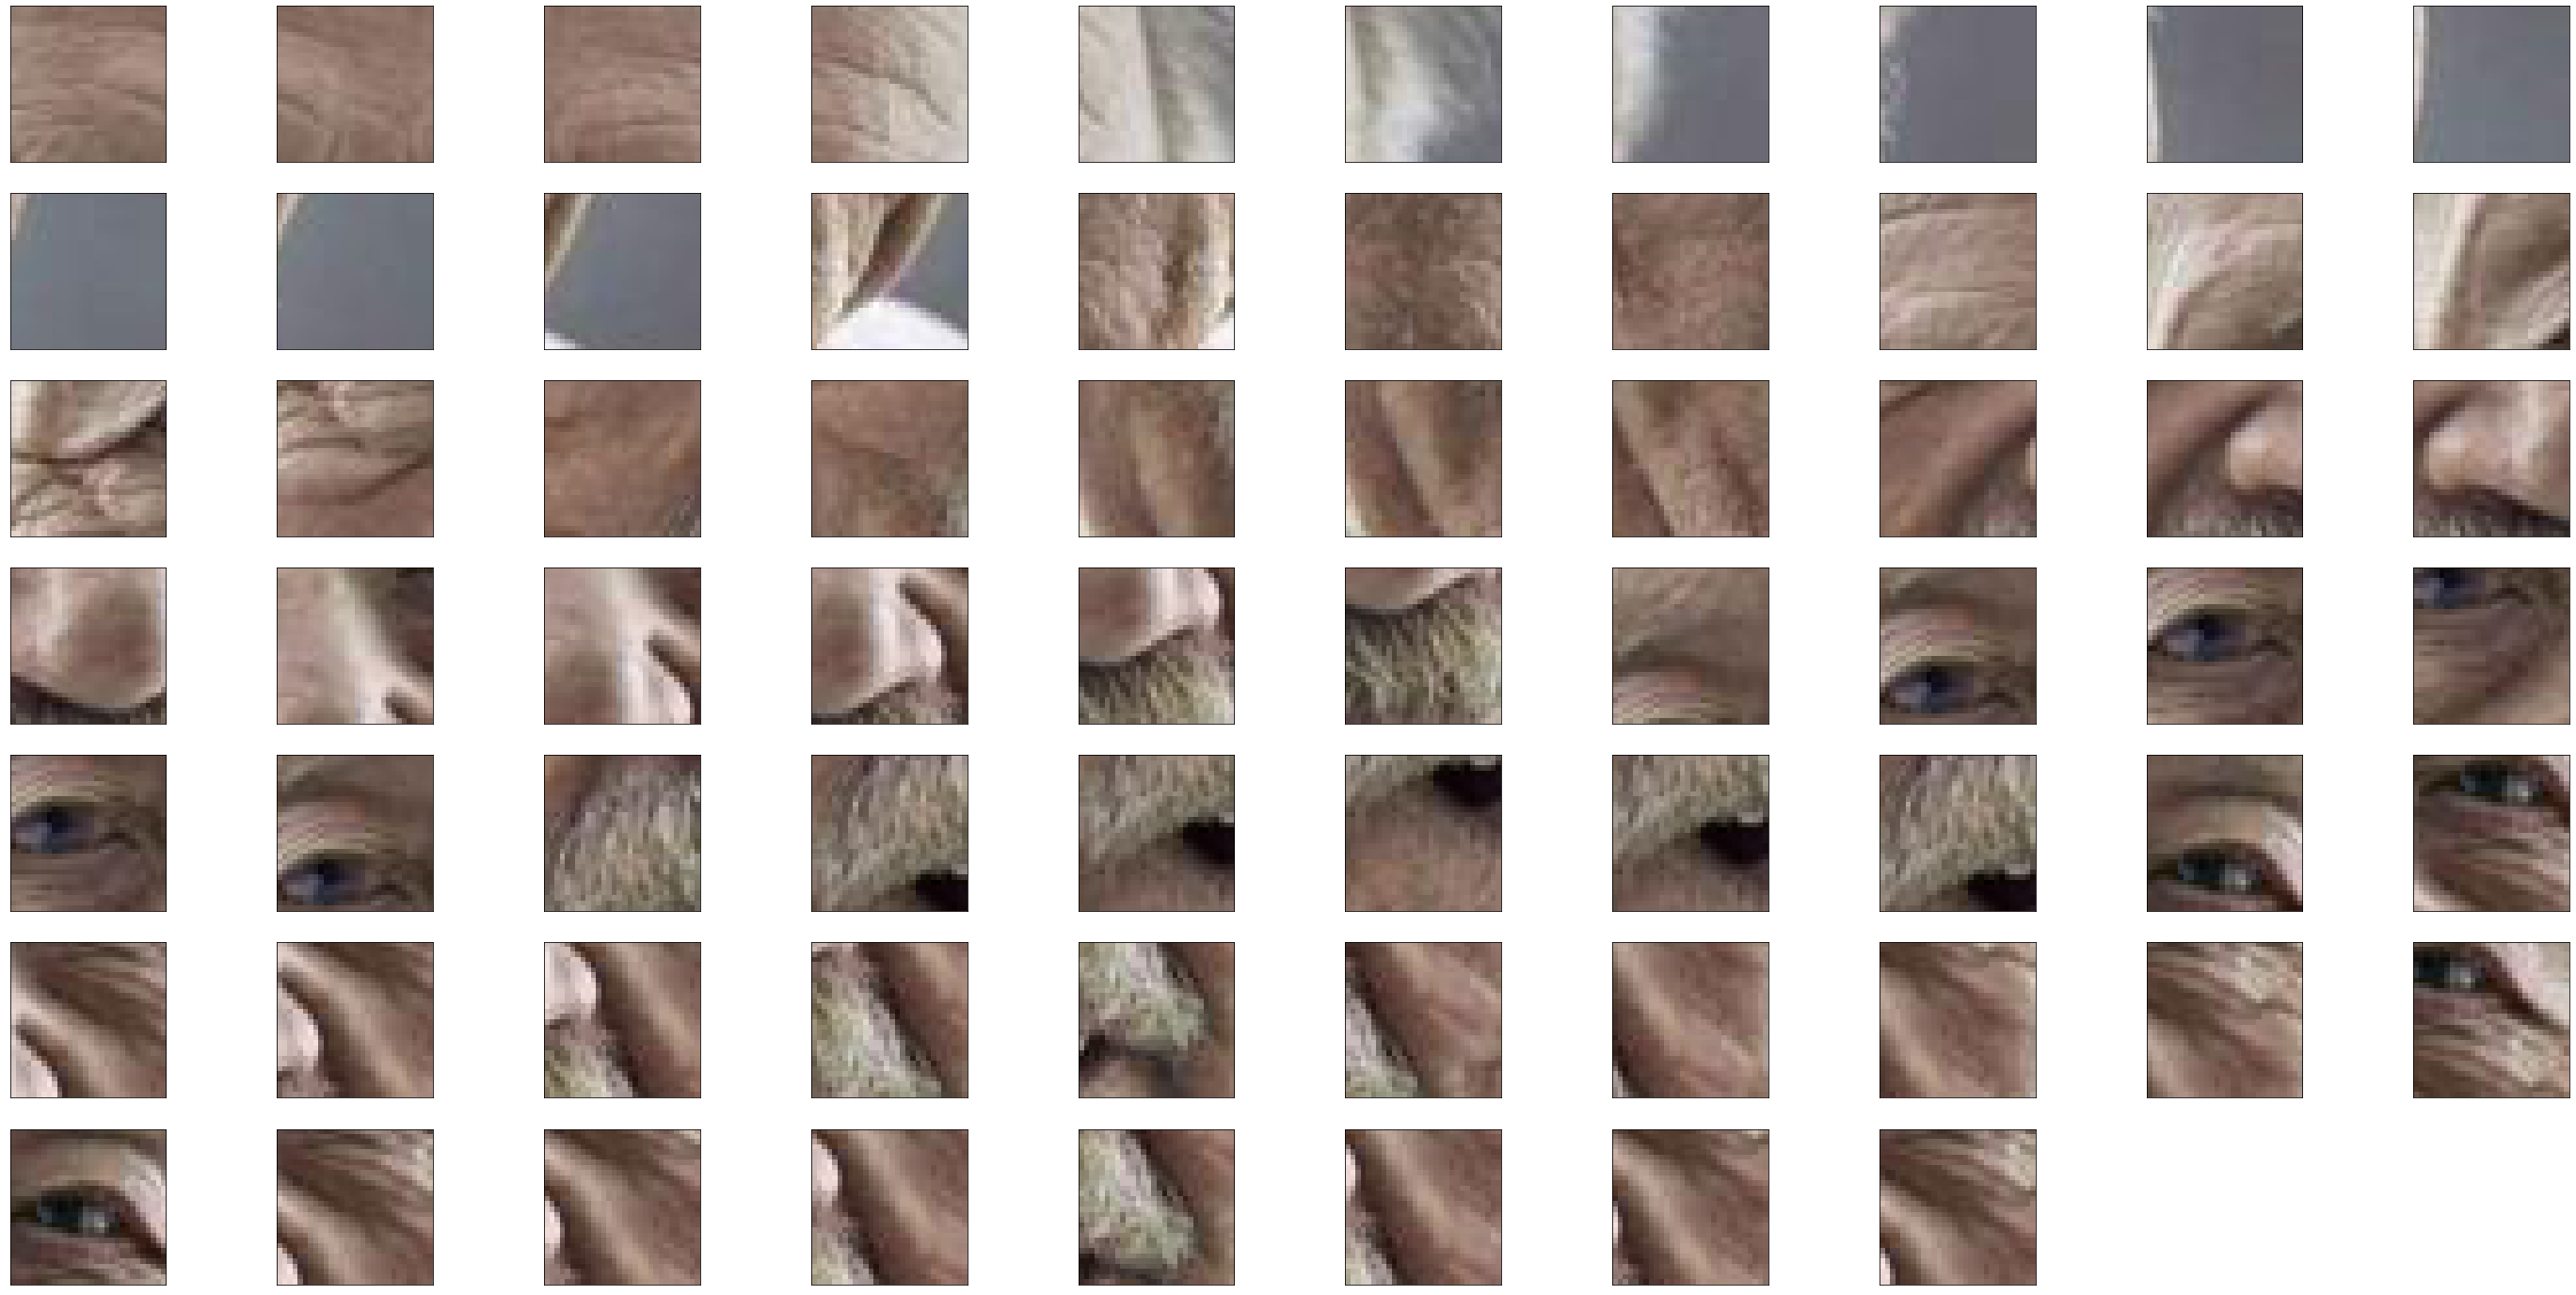

In [17]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline



plt.figure(figsize=(50,25))
columns = 10
for i, image in enumerate(imgs):
    plt.subplot(len(imgs) / columns + 1, columns, i + 1)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
plt.savefig("Landmarks_ex.png", bbox_inches='tight',dpi=200)